# In Wai Cheong (ic2518)
# COMS 6998 HW 4

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras

## Question 1) 

For fine-tuning you will select a target dataset from the Visual-Decathlon challenge. Their web site (link below) has several datasets which you can download. Select any one of the visual decathlon dataset
and make it your target dataset for transfer learning. Important : Do not select Imagenet1K as
the target dataset. <br>

(1a) Finetuning: You will first load a pretrained model (Resnet50) and change the final fully connected
layer output to the number of classes in the target dataset. Describe your target dataset features,
number of classes and distribution of images per class (i.e., number of images per class). Show
any 4 sample images (belonging to 2 different classes) from your target dataset.

169009152/169001437 [==============================] - 11s 0us/step
Number of samples in training set: 50000
Number of classes: 256
100 classes containing 60 images each


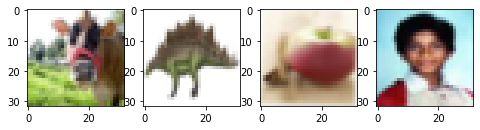

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train  /= 255.0
X_test /= 255.0

print('Number of samples in training set:',len(X_train))
print('Number of classes:',len(np.unique(X_test)))
print('100 classes containing 60 images each')

fig = plt.figure(figsize = (8,10))
plt.subplot(1,4,1)
plt.imshow(X_train[0])
plt.subplot(1,4,2)
plt.imshow(X_train[1])
plt.subplot(1,4,3)
plt.imshow(X_train[2])
plt.subplot(1,4,4)
plt.imshow(X_train[3])

In [ ]:
from keras.applications.resnet50 import ResNet50
# load model
model = ResNet50(input_shape = (32,32,3),weights=None,classes=100)

Using TensorFlow backend.


In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 100)
(10000, 100)


(1b) First finetune by setting the same value of hyperparameters (learning rate=0.001, momentum=0.9)
for all the layers. Keep batch size of 64 and train for 200-300 epochs or until model converges well.
You will use a multi-step learning rate schedule and decay by a factor of 0.1 (
 = 0:1 in the link
below). You can choose steps at which you want to decay the learning rate but do 3 drops during
the training. So the first drop will bring down the learning rate to 0.0001, second to 0.00001, third
to 0.000001. For example, if training for 200 epochs, first drop can happen at epoch 60, second at
epoch 120 and third at epoch 180.

In [ ]:
#SGD Hyperparameters
tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=False, name="SGD")

#Compiling Model
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting model
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=0)
history.history['accuracy']

[0.08077999949455261,
 0.1469999998807907,
 0.19043999910354614,
 0.22519999742507935,
 0.2630000114440918,
 0.303600013256073,
 0.33823999762535095,
 0.3697800040245056,
 0.40803998708724976,
 0.43935999274253845,
 0.4765799939632416,
 0.5186200141906738,
 0.5549399852752686,
 0.5952000021934509,
 0.6313199996948242,
 0.6670399904251099,
 0.6957399845123291,
 0.7367200255393982,
 0.7719200253486633,
 0.7865599989891052,
 0.8120200037956238,
 0.8421199917793274,
 0.8501200079917908,
 0.8646799921989441,
 0.8796799778938293,
 0.890500009059906,
 0.9078400135040283,
 0.9072399735450745,
 0.9130399823188782,
 0.9183400273323059,
 0.9259799718856812,
 0.9387000203132629,
 0.942579984664917,
 0.9464799761772156,
 0.9434400200843811,
 0.9456999897956848,
 0.9497799873352051,
 0.9567199945449829,
 0.9549199938774109,
 0.9656000137329102,
 0.9661200046539307,
 0.9722800254821777,
 0.9744799733161926,
 0.9783999919891357,
 0.9786199927330017,
 0.9808599948883057,
 0.9831600189208984,
 0.9806200

(1c) Next keeping all the hyperparameters same as before, change the learning rate to 0.01 and 0.1
uniformly for all the layers. This means keep all the layers at same learning rate. So you will be
doing two experiments, one keeping learning rate of all layers at 0.01 and one with 0.1. Again
finetune the model and report the final accuracy. How does the accuracy with the three learning
rates compare ? Which learning rate gives you the best accuracy on the target dataset ?

In [ ]:
#SGD Hyperparameters
tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

#Compiling Model
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting model
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=0)
history.history['accuracy']

[0.9964200258255005,
 0.9967399835586548,
 0.9954400062561035,
 0.9970399737358093,
 0.9980800151824951,
 0.9975200295448303,
 0.9982799887657166,
 0.9985399842262268,
 0.9974799752235413,
 0.9979000091552734,
 0.9980000257492065,
 0.9983400106430054,
 0.9984400272369385,
 0.9985600113868713,
 0.9975000023841858,
 0.9976400136947632,
 0.9978600144386292,
 0.997759997844696,
 0.9959800243377686,
 0.9972000122070312,
 0.9975600242614746,
 0.997979998588562,
 0.9975799918174744,
 0.9976400136947632,
 0.9977800250053406,
 0.998520016670227,
 0.9973999857902527,
 0.9969800114631653,
 0.9979199767112732,
 0.9982799887657166,
 0.9980199933052063,
 0.9985600113868713,
 0.9983999729156494,
 0.9988800287246704,
 0.998199999332428,
 0.9979599714279175,
 0.9976599812507629,
 0.9973199963569641,
 0.9973999857902527,
 0.9978399872779846,
 0.9986199736595154,
 0.9980599880218506,
 0.9984599947929382,
 0.9988200068473816,
 0.9988399744033813,
 0.9975799918174744,
 0.9983599781990051,
 0.99856001138687

In [ ]:
#SGD Hyperparameters
tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False, name="SGD")

#Compiling Model
model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

#Fitting model
history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=0)
history.history['accuracy']

[0.9988200068473816,
 0.9990599751472473,
 0.9983400106430054,
 0.9986799955368042,
 0.9989200234413147,
 0.9990599751472473,
 0.999180018901825,
 0.999019980430603,
 0.9991999864578247,
 0.998740017414093,
 0.9991599917411804,
 0.9993000030517578,
 0.999239981174469,
 0.9992799758911133,
 0.9991599917411804,
 0.9993199706077576,
 0.999180018901825,
 0.9988600015640259,
 0.9990400075912476,
 0.9986000061035156,
 0.999180018901825,
 0.9989799857139587,
 0.998960018157959,
 0.9990800023078918,
 0.9983999729156494,
 0.9986000061035156,
 0.9988200068473816,
 0.9982399940490723,
 0.998420000076294,
 0.9983199834823608,
 0.998740017414093,
 0.9988800287246704,
 0.9986400008201599,
 0.9977999925613403,
 0.9976199865341187,
 0.9975399971008301,
 0.9983599781990051,
 0.998740017414093,
 0.9983400106430054,
 0.9986000061035156,
 0.9988399744033813,
 0.9992799758911133,
 0.9993000030517578,
 0.9984999895095825,
 0.9988800287246704,
 0.997979998588562,
 0.9987800121307373,
 0.9968199729919434,
 0.

###Learning Rates:

LR = 0.1: Accuracy is 0.9988399744033813 <br>
LR = 0.01: Accuracy is 0.999180018901825 <br>
LR = 0.001: Accuracy is 0.9965199828147888 <br>

LR of 0.01 yields the best accuracy.

(2a) Now train only the last layer for 1, 0.1, 0.01, and 0.001 while keeping all the other hyperparameters
and settings same as earlier for finetuning. Which learning rate gives you the best accuracy on
the target dataset ?

In [ ]:
for i in range(176):
  model.layers[i].trainable = False

LR = [1,0,1,0.01,0.001]
for i in LR:
  tf.keras.optimizers.SGD(learning_rate=0.1, momentum=0.9, nesterov=False, name="SGD")

  #Compiling Model
  model.compile(optimizer='SGD',loss='categorical_crossentropy',metrics=['accuracy'])

  #Fitting model
  history = model.fit(X_train, y_train, batch_size=64, epochs=200, validation_data=(X_test,y_test),shuffle=True,verbose=0)
  print(history.history['accuracy'])

(2b) For your target dataset find the best final accuracy (across all the learning rates) from the two
transfer learning approaches. Which approach and learning rate is the winner? Provide a plausible
explanation to support your observation.

## Question 2

1. Both the papers use the same 1B image dataset. However one does weakly supervised pretraining while
the other does semi-supervised . What is the difference between weakly supervised and semi-supervised
pretraining ? How do they use the same dataset to do two different types of pretraining ? Explain.

### Solution:
Weakly supervised pretraining using noisy labels, whereas semi-supervised learning has a teacher model trained on labeled data to generate labels for the unlabeled data.

2. These questions are based on the paper by Mahajan et al. <br>
(a) Are the model trained using hashtags robust against noise in the labels ? What experiments were
done in the paper to study this and what was the finding ? Provide numbers from the paper to
support your answer. <br>
(b) Why is resampling of hashtag distribution important during pretraining for transfer learning ?


### Solution

Yes, the model trained using hashtags were robust again noise. They pre-trained a ResNeXt model with 1B images and 17k labels where a portion of the labels were randomly replaced with hashtags sampled from the marginal distribution. p = 10% decreased the top-1 accuracy on ImageNet by around 1%, and that p = 25% decreased accuracy by about 2%. <br>

Resampling the hashtag distribution allows to make sure that all classes are accounted for, and that there won't be a class left out during training. Since the hashtags followed a Zipfian distribution, if we just sample from that - a lot of classes would be under-represented.

3. These questions are based on the paper by Yalzin et al. <br>
(a) Why are there two models, a teacher and a student, and how does the student model leverages the
teacher model ? Explain why teacher-student modeling is a type of distillation technique. <br>
(b) What are the parameters K and P in stage 2 of the approach where unlabeled images are assigned
classes using teacher network ? What was the idea behind taking P > 1 ? Explain in your own
words. <br>
(c) Explain how a new labeled dataset is created using unlabeled images ? Can an image in this new
dataset belong to more than one class ? Explain. <br>
(d) Refer to Figure 5 in the paper. Why does the accuracy of the student model first improves as we
increase the value of K and then decreases ?

### Solution

a) The teacher and student model is needed since the teacher model selects the top-K images in the unlabeled dataset and this dataset allows us generate a new training set. Since the student model is always 'smaller' than the teacher model, it is a distillation technique.

b) $K$ refers to the number of examples in $\mathcal{U}$ used to construct $\hat{\mathcal{D}}$ for each label in $\mathcal{D}$. The parameter $P$ determines how many classes a candidate top-K image $I$ is allowed to belong to. The idea behind taking $P > 1$ frequent and non-frequent occurences are both accounted for.

c) The new labeled dataset is created from the teacher model that selects the top-K images. For each image in the top-K, the image is then tagged with the classes corresponding to the $P$ largest elements in its softmax vector which allow an image to belong to more than 1 class. 

d) Increasing $K$ initially lets the student network allowed to be trained on more labeled data, without the noise problem. We will then end up with a higher quality dataset and leads to better performance. But if we keep increasing $K$ past a certain threshold, there will end up being too much noise in the labels which affects the dataset quality which in turn affects performance negatively.

## Question 3

1. Why achieving peak FLOPs from hardware devices like GPUs is a dicult propostion in real systems
? How does PPP help in capturing this ineffciency captured in Paleo model.

### Solution:

If we were to achieve peak FLOPS, then the framework would need to be optimized for the GPUs which would require in-depth knowledge of the GPUs themselves. PPP measure takes multiple factors into account by displaying the current FLOPs as a percentage of the theoretical maximum afforded by the hardware & software. 

2. Lu et al. showed that FLOPs consumed by convolution layers in VG16 account for about 99% of the
total FLOPS in the forward pass. We will do a similar analysis for VGG19. Calculate FLOPs for
dierent layers in VGG19 and then calculate fraction of the total FLOPs attributed by convolution
layers.

3. Study the tables showing timing benchmarks from Alexnet (Table 2), VGG16 (Table 3), Googlenet
(Table 5), and Resnet50 (Table 6). Why the measured time and sum of layerwise timings for forward
pass did not match on GPUs ? What approach was adopted in Sec. 5 of the paper to mitigate the
measurement overhead in GPUs.

### Solution:

The measured time and sum of layerwise timing for forward pass did not match on GPUs because CUDA allows for asynchronous computation. The cores on the GPU are sychronized so the timing will be off. The paper resolved this problem by running matrix multiplications asynchronously for many iterations, and with high iterations - the imapct of the overhead is pretty much negligible.

4. In Lu et al. FLOPs for dierent layers of a DNN are calculated. Use FLOPs numbers for VGG16
(Table 3), Googlenet (Table 5), and Resnet50 (Table 6), and calculate the inference time (time to have
a forward pass with one image) using published T
ops number for K80 (Refer to NVIDIA TESLA
GPU Accelerators). Use this to calculate the peak (theoretical) throughput achieved with K80 for these
3 models.

### Solution

Tesla K80: double precision peak performance of 1.87 Tflops. 

Forward pass on VGG requires 15503M FLOPs; as such, one forward pass on a K80 would take $(15503 \times 10^6) / (1.87 \times 10^{12}) = 0.00829037433s$ so throughput is 120 images/sec.

GoogLeNet inference time: $(1606 * 10^6) / (1.87 \times 10^{12}) = 0.00085882352s$ per image. Throughoutput: 1164 images/sec.

ResNet inference time: $(3922 * 10^6) / (1.87 \times 10^{12}) = 0.0020973262s$. Throughput: 477 images/sec.